In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Phu
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
pd.set_option('display.max_columns', None)


In [3]:
data_df=pd.read_csv('Data/Sex_Offender_Registry.csv')
data_df.head(5)

,X,Y,OBJECTID,BLOCK_X,BLOCK_Y,DCS_LAST_MOD_DTM,SEXOFFENDERCODE,ADDDATE,LASTNAME,FIRSTNAME,ALIASES,MAXCLASSIFICATION,BIRTHDATE,HEIGHTNUM,WEIGHTNUM,EYECOLOR,HAIRCOLOR,MARKINGS,REGISTRATIONDATE,TYPE,DISTRICT,PSA,BLOCKNAME,QUADRANT,ZIP
0,-76.973974,38.863542,4236689,402259,132858,2021/01/14 06:15:24+00,002-910,2016/08/02 09:34:44+00,SANDERS,ANTHONY,DERRICK JUICE / X JUICE / ANTHONY SANDERS /...,A,1969/06/19 00:00:00+00,66,138,BROWN,BLACK,TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...,2016/08/29 00:00:00+00,HOME,6.0,607.0,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE,SE,20020
1,-76.972648,38.857499,4236690,402374,132187,2021/01/14 06:15:24+00,002-913,2016/08/04 14:42:53+00,GAYLES,JERMAINE,ROBERT GAYLES / JERMAINE IRVIN / JERMAINE I...,B,1986/06/25 00:00:00+00,73,200,BROWN,BLACK,NaN,2018/02/22 00:00:00+00,HOME,7.0,701.0,2300 - 2399 BLOCK OF AINGER PLACE SE,SE,20020
2,-76.971451,38.932130,4236691,402476,140472,2021/01/14 06:15:24+00,002-919,2016/08/09 18:06:15+00,HARRIS,REGINALD,REGINALD ELBERT HARRIS-WILLS,B,1995/02/12 00:00:00+00,67,157,BROWN,BLACK,"TATTOO ON LOWER RIGHT ARM ""LAMONT""; TATTOO ON ...",2016/10/20 00:00:00+00,HOME,5.0,503.0,2400 - 2499 BLOCK OF LAWRENCE STREET NE,NE,20018
3,-77.010605,38.914089,4236692,399080,138468,2021/01/14 06:15:24+00,002-927,2016/08/30 11:29:37+00,STRICKLAND,GARY,MELVIN,B,1967/01/22 00:00:00+00,74,245,BROWN,BLACK,"TATTOO ON SHOULDER ""TINA""; GUNSHOT WOUNDS ON B...",2016/09/01 00:00:00+00,HOME,3.0,308.0,1 - 99 BLOCK OF S STREET NW,NW,20001
4,-77.021917,38.913356,4236693,398099,138387,2021/01/14 06:15:24+00,002-928,2016/08/31 10:07:09+00,GANT,TIMOTHY,TIMOTHY GANT,B,1989/09/19 00:00:00+00,71,285,BROWN,BLACK,TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...,2017/02/09 00:00:00+00,WORK,3.0,308.0,1700 - 1799 BLOCK OF 7TH STREET NW,NW,20001


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

In [4]:
num_rows,num_cols=data_df.shape
data_df.shape

(1323, 25)

### Dữ liệu có các dòng bị lặp không

In [5]:
data_df.duplicated().sum()

0

### Mỗi cột đang có kiểu dữ liệu gì, có cột nào chưa có kiểu dữ liệu phù hợp

In [6]:
data_df.dtypes

X                    float64
Y                    float64
OBJECTID               int64
BLOCK_X                int64
BLOCK_Y                int64
DCS_LAST_MOD_DTM      object
SEXOFFENDERCODE       object
ADDDATE               object
LASTNAME              object
FIRSTNAME             object
ALIASES               object
MAXCLASSIFICATION     object
BIRTHDATE             object
HEIGHTNUM              int64
WEIGHTNUM              int64
EYECOLOR              object
HAIRCOLOR             object
MARKINGS              object
REGISTRATIONDATE      object
TYPE                  object
DISTRICT             float64
PSA                  float64
BLOCKNAME             object
QUADRANT              object
ZIP                    int64
dtype: object

Các cột 'DCS_LAST_MOD_DTM', 'ADDDATE','BIRTHDATE','REGISTRATIONDATE' có kiểu dữ liệu chưa phù hợp, chuyển về kiểu dữ liệu phù hợp

In [7]:
datetime_cols = ['DCS_LAST_MOD_DTM', 'ADDDATE','BIRTHDATE','REGISTRATIONDATE']
data_df[datetime_cols] = data_df[datetime_cols].apply(pd.to_datetime, format = '%Y/%m/%d %H:%M:%S')
data_df[datetime_cols].dtypes

DCS_LAST_MOD_DTM    datetime64[ns, UTC]
ADDDATE             datetime64[ns, UTC]
BIRTHDATE           datetime64[ns, UTC]
REGISTRATIONDATE    datetime64[ns, UTC]
dtype: object

### Tính tỉ lệ % giá trị thiếu, số các giá trị, các giá trị khác nhau, min, max

In [8]:
def missing_ratio(s):
    return s.isna().mean()*100
def diff_vals(s):
    return s.unique()
def num_diff_vals(s):
    if missing_ratio(s) > 0:
        num = len(diff_vals(s)) -1
    else:
        num = len(diff_vals(s))
    return num

Tính tỉ lệ % giá trị thiếu cho các cột

In [9]:
#các cột thiếu giá trị
missing_cols = data_df.columns[data_df.isna().sum()>0]
missing_cols

Index(['ALIASES', 'MARKINGS', 'DISTRICT', 'PSA'], dtype='object')

In [10]:
data_df[missing_cols].agg(missing_ratio)

ALIASES     40.513983
MARKINGS    69.160998
DISTRICT     0.302343
PSA          0.377929
dtype: float64

Chuyển cột 'HEIGHTNUM', 'WEIGHTNUM' sang đơn vị chuẩn

In [11]:
data_df['HEIGHTNUM'] *= 0.0254
data_df['WEIGHTNUM'] *= 0.45359237

Xem sự phân bố giá trị của các cột 'X', 'Y','BLOCK_X', 'BLOCK_Y', 'HEIGHTNUM', 'WEIGHTNUM','PSA'

In [12]:
numeric_cols = ['X', 'Y','BLOCK_X', 'BLOCK_Y', 'HEIGHTNUM', 'WEIGHTNUM','PSA']
numeric_info = pd.concat([data_df[numeric_cols].describe(),data_df[numeric_cols]
                          .agg([missing_ratio])],axis = 0)
numeric_info

,X,Y,BLOCK_X,BLOCK_Y,HEIGHTNUM,WEIGHTNUM,PSA
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1318.000000
mean,-76.991895,38.893214,400703.764172,136151.686319,1.764906,86.410889,472.559939
std,0.033353,0.035072,2892.936748,3893.451535,0.083545,17.540768,206.113360
min,-77.106992,38.819395,390723.000000,127957.000000,1.371600,49.895161,101.000000
25%,-77.013656,38.867606,398816.000000,133309.500000,1.701800,74.615945,305.000000
50%,-76.992032,38.897714,400692.000000,136651.000000,1.752600,83.914588,506.000000
75%,-76.973688,38.916827,402282.500000,138772.500000,1.828800,95.934786,608.000000
max,-76.910930,38.982395,407727.000000,146051.000000,2.032000,195.044719,708.000000
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377929


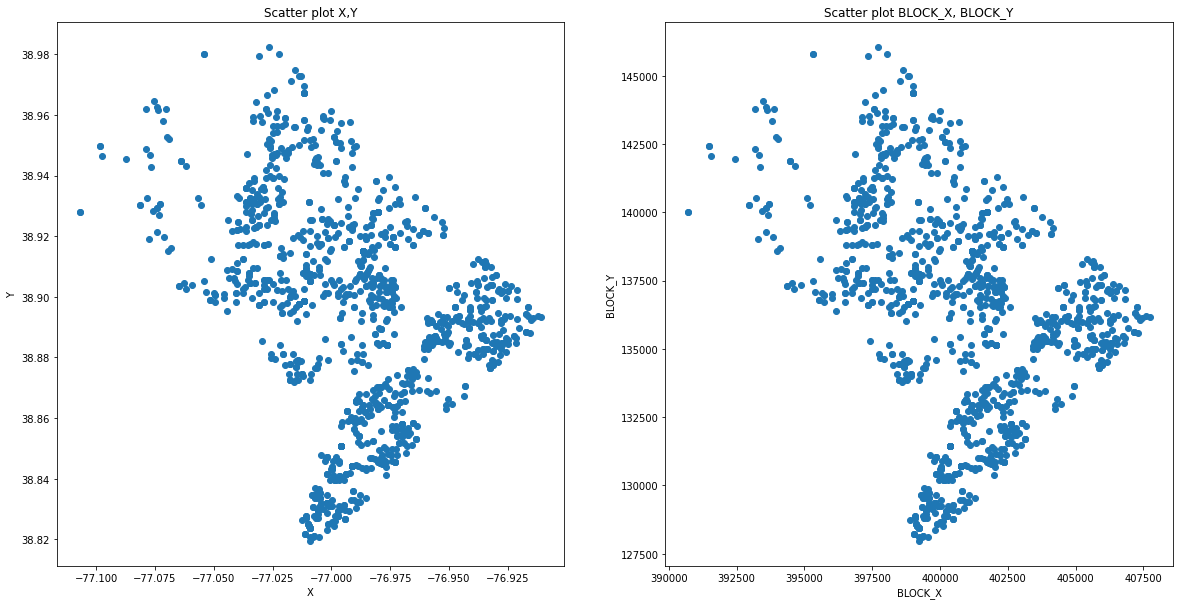

In [13]:
f, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].scatter(data_df.X, data_df.Y, )
ax[0].set_title('Scatter plot X,Y')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(data_df.BLOCK_X, data_df.BLOCK_Y)
ax[1].set_title('Scatter plot BLOCK_X, BLOCK_Y')
ax[1].set_xlabel('BLOCK_X')
ax[1].set_ylabel('BLOCK_Y')
plt.show()

X,Y có sự tương đồng với BLOCK_X,BLOCK_Y nên ta sẽ loại bỏ 2 cột BLOCK_X,BLOCK_Y

In [14]:
data_df=data_df.drop(['BLOCK_X','BLOCK_Y'],axis=1)

Xem sự phân bố giá trị của các cột có kiểu dữ liệu categorical

In [15]:
cate_cols = ['SEXOFFENDERCODE', 'LASTNAME', 'FIRSTNAME', 'ALIASES','MAXCLASSIFICATION', 'EYECOLOR', 'HAIRCOLOR',
             'MARKINGS', 'TYPE', 'BLOCKNAME', 'QUADRANT','OBJECTID','ZIP', 'DISTRICT']

In [16]:
data_df[cate_cols].agg([diff_vals, num_diff_vals, missing_ratio])

,SEXOFFENDERCODE,LASTNAME,FIRSTNAME,ALIASES,MAXCLASSIFICATION,EYECOLOR,HAIRCOLOR,MARKINGS,TYPE,BLOCKNAME,QUADRANT,OBJECTID,ZIP,DISTRICT
diff_vals,"[002-910, 002-913, 002-919, 002-927, 002-928, ...","[SANDERS, GAYLES, HARRIS, STRICKLAND, GANT, ME...","[ANTHONY, JERMAINE, REGINALD, GARY, TIMOTHY, D...",[DERRICK JUICE / X JUICE / ANTHONY SANDERS ...,"[A, B]","[BROWN, BLUE, HAZEL, GRAY, BLACK, GREEN, MULTI...","[BLACK, BROWN, BALD, BLACK/GRAY, RED, BLONDE, ...",[TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIS...,"[HOME, WORK, SCHOOL]","[2300 - 2399 BLOCK OF GOOD HOPE ROAD SE, 2300 ...","[SE, NE, NW, SW]","[4236689, 4236690, 4236691, 4236692, 4236693, ...","[20020, 20018, 20001, 20015, 20005, 20003, 200...","[6.0, 7.0, 5.0, 3.0, 1.0, 2.0, 4.0, nan]"
num_diff_vals,1059,703,455,630,2,8,11,325,3,887,4,1323,27,7
missing_ratio,0,0,0,40.514,0,0,0,69.161,0,0,0,0,0,0.302343


Cột "MARKINGS" có tỉ lệ thiếu đến 69,161%, ta sẽ xem xét các giá trị của cột này

In [17]:
markings = data_df[~data_df['MARKINGS'].isna()]['MARKINGS']
markings

0       TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...
2       TATTOO ON LOWER RIGHT ARM "LAMONT"; TATTOO ON ...
3       TATTOO ON SHOULDER "TINA"; GUNSHOT WOUNDS ON B...
4       TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...
5       TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...
                              ...                        
1255    TATTOO LEFT ARM CROSS & HEART - RIGHT ARM REBE...
1272    TATTOO - TEAR DROP BELOW LEFT AND RIGHT EYE; H...
1299    TATTOO ON UPPER RIGHT ARM" TUNE WITHIN A OPEN ...
1300    TATTOO ON UPPER RIGHT ARM" TUNE WITHIN A OPEN ...
1302    TATTOO ON LEFT HAND "PICTURE OF ROSE WITH WORD...
Name: MARKINGS, Length: 408, dtype: object

Ta thấy hầu hết các giá trị đều xuất hiện "TATTOO", ta sẽ tính tính lệ có "TATTOO" so với tổng số người có đặc điểm nhận dạng

In [18]:
(np.sum(markings.apply(lambda x: 'TATTOO' in x)) / len(markings))*100

82.35294117647058

Đối với những tội phạm có đặc điểm nhận dạng thì những người có "TATTOO" chiếm tỉ lệ khá là cao

Ta sẽ tính tính lệ có "TATTOO" so với tổng số tội phạm

In [19]:
(np.sum(markings.apply(lambda x: 'TATTOO' in x)) / data_df.shape[0])*100

25.396825396825395

# Đưa ra các câu hỏi và trả lời

## Câu hỏi 1: Đặc điểm nhận dạng chung của các tội phạm

Ta sẽ thêm cột BMI được tính theo công thức $BMI=\frac{WEIGHTNUM}{HEIGHTNUM^{2}}$ và phân loại cấp độ
- Gầy < 18.5
- Bình thường 18.5 - 25
- Thừa cân 25 - 30
- Béo phì >=30

In [20]:
data_df.dtypes

X                                float64
Y                                float64
OBJECTID                           int64
DCS_LAST_MOD_DTM     datetime64[ns, UTC]
SEXOFFENDERCODE                   object
ADDDATE              datetime64[ns, UTC]
LASTNAME                          object
FIRSTNAME                         object
ALIASES                           object
MAXCLASSIFICATION                 object
BIRTHDATE            datetime64[ns, UTC]
HEIGHTNUM                        float64
WEIGHTNUM                        float64
EYECOLOR                          object
HAIRCOLOR                         object
MARKINGS                          object
REGISTRATIONDATE     datetime64[ns, UTC]
TYPE                              object
DISTRICT                         float64
PSA                              float64
BLOCKNAME                         object
QUADRANT                          object
ZIP                                int64
dtype: object

In [21]:
data_df['BMI']=(data_df['WEIGHTNUM']/(data_df['HEIGHTNUM']**2)).astype('float')
for idx in data_df['BMI'].index:
    bmi=float(data_df['BMI'][idx])
    if bmi < 18.5:
        data_df.loc[idx,'BMI'] = 'Gầy'
    elif bmi < 25:
        data_df.loc[idx,'BMI'] = 'Bình thường'
    elif bmi < 30:
        data_df.loc[idx,'BMI'] ='Thừa cân'
    else:
        data_df.loc[idx,'BMI'] = 'Béo phì'


Tính số giá trị và phần trăm xuất hiện của các giá trị trong các cột 'EYECOLOR', 'HAIRCOLOR' , 'BMI'

In [22]:
pd.set_option('display.max_colwidth', 300) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
def value_ratios(col):
    return dict(((col.value_counts()/len(col))*100).round(1))
cate_col_df=data_df[['EYECOLOR','HAIRCOLOR','BMI']].copy()
cate_col_df = cate_col_df.agg([num_diff_vals, value_ratios])
cate_col_df

,EYECOLOR,HAIRCOLOR,BMI
num_diff_vals,8,11,4
value_ratios,"{'BROWN': 91.3, 'BLUE': 2.9, 'BLACK': 2.2, 'HAZEL': 2.0, 'GREEN': 1.2, 'GRAY': 0.3, 'MULTICOLORED': 0.1, 'UNKNOWN': 0.1}","{'BLACK': 59.7, 'BROWN': 13.8, 'BALD': 13.1, 'BLACK/GRAY': 8.9, 'GRAY': 2.3, 'BLONDE': 1.1, 'BROWN/GRAY': 0.6, 'RED': 0.3, 'WHITE': 0.2, 'UNKNOWN': 0.1, 'SANDY': 0.1}","{'Thừa cân': 42.3, 'Bình thường': 31.2, 'Béo phì': 26.2, 'Gầy': 0.3}"


## Câu hỏi 2: Độ tuổi phổ biến của tội phạm

Text(0.5, 0, '')

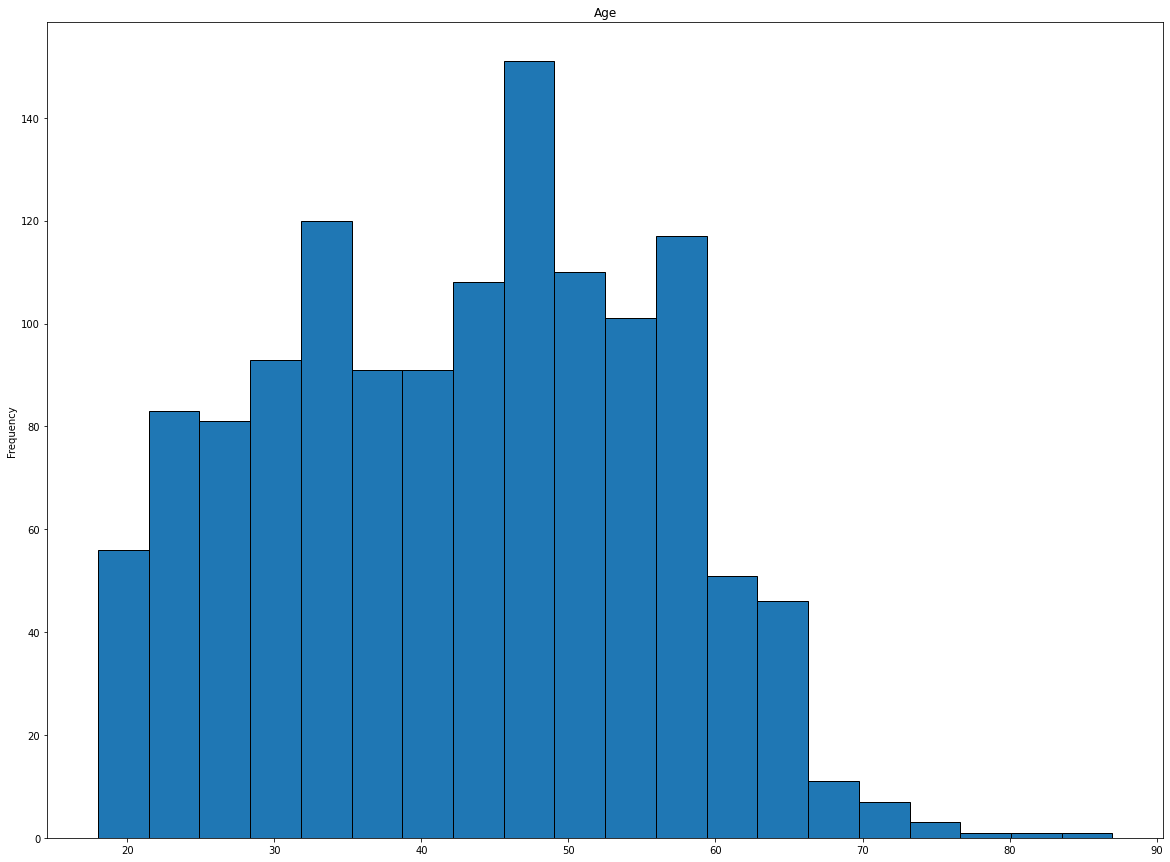

In [23]:
age=(data_df['ADDDATE']-data_df['BIRTHDATE']).apply(lambda x: int(x.days/365))
#age,count=np.unique(age,return_counts=True)
plt.figure(figsize=(20,15))
ax = plt.subplot()
age.plot.hist(edgecolor ='black',bins=20)
ax.set_title('Age')
ax.set_xlabel('')

## Câu hỏi 3: Mức độ phạm tội của các tội phạm theo từng vị trí địa chỉ

In [24]:
pd.set_option('display.max_colwidth', 300) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
class_type_df=data_df[['MAXCLASSIFICATION','TYPE']].copy()
class_type_df = class_type_df.agg([num_diff_vals, value_ratios])
class_type_df

,MAXCLASSIFICATION,TYPE
num_diff_vals,2,3
value_ratios,"{'A': 50.2, 'B': 49.8}","{'HOME': 77.1, 'WORK': 19.5, 'SCHOOL': 3.4}"


In [25]:
arr_class=data_df['MAXCLASSIFICATION'].unique()
arr_type=data_df['TYPE'].unique()
class_type_ratio_df=pd.DataFrame()
for i in arr_class:
    class_df=data_df[data_df['MAXCLASSIFICATION']==i]
    list_ratios=[]
    for j in arr_type:
        ratios=((class_df['TYPE']==j).mean()*100).round(1)
        list_ratios.append(ratios)
    class_type_ratio_df[i]=list_ratios
class_type_ratio_df=(((class_type_ratio_df.set_index(arr_type)).sort_values(by=['A'],ascending=False)).T).sort_values(by=['HOME'],ascending=False)
class_type_ratio_df

,HOME,WORK,SCHOOL
A,81.5,15.2,3.3
B,72.7,23.8,3.5


C:\Users\Computer\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'CLASS')

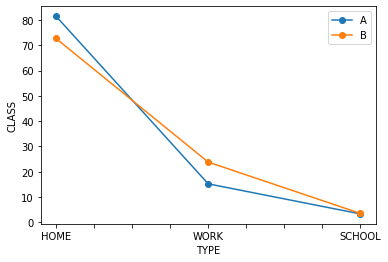

In [26]:
class_type_ratio_df.T.plot.line(marker='o')
plt.xlabel('TYPE')
plt.ylabel('CLASS')

## Câu hỏi 4: Sự phân bố của các tội phạm theo vị trí địa lí

In [27]:
map = folium.Map(location = [data_df.Y.mean(), data_df.X.mean()], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(map)
for i in range(len(data_df)):
    folium.Marker(
    location=[data_df.Y[i], data_df.X[i]],
    popup=str(data_df.OBJECTID[i]) + '\n' + data_df.TYPE[i] + '\n' + data_df.MAXCLASSIFICATION[i]).add_to(incidents)
map.add_child(incidents)

NameError: name 'san_map' is not defined

In [ ]:
incidents = folium.map.FeatureGroup()
data_home_df=data_df[data_df['TYPE']=='HOME']
data_work_df=data_df[data_df['TYPE']=='WORK']
data_school_df=data_df[data_df['TYPE']=='SCHOOL']
for lat, lng, label in zip(data_home_df.Y, data_home_df.X, data_home_df.OBJECTID):
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng],
    radius=2,
    popup=label))
for lat, lng, label in zip(data_work_df.Y, data_work_df.X, data_work_df.OBJECTID):
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng],
    radius=2,
    color='red',
    popup=label))
for lat, lng, label in zip(data_school_df.Y, data_school_df.X, data_school_df.OBJECTID):
    incidents.add_child(
    folium.CircleMarker(
    [lat, lng],
    radius=2,
    color='black',
    popup=label))
map = folium.Map(location=[data_df.Y.mean(), data_df.X.mean()], zoom_start=12)
map.add_child(incidents)

In [ ]:
map = folium.Map(location = [data_df.Y.mean(), data_df.X.mean()], zoom_start = 12)
heatdata = data_df[['Y','X']].values.tolist()
plugins.HeatMap(heatdata).add_to(map)
map